In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
%matplotlib inline

# unknown $\mu$ and unknown $\sigma$ ----------------------------------------

## hypothesis

$H_{0}$: mean $\sigma = \sigma_{0}$

$H_{1}$: mean $\sigma \neq \sigma_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [68]:
N = 20         # number of samples.
sgm = 2.0      # sigma 0
mu_true = 10.0 # true mean
mu_test = 9.6  # mu0
sg0 = 1.8

x = np.random.normal(loc=mu_true, scale=sgm, size=N)
mu_pop = x.mean()
S = np.sqrt(((x - x.mean())**2).sum() / (N - 1))
print('population mean = {:2.3f}'.format(mu_pop))
print('S               = {:2.3f}'.format(S))

population mean = 9.140
S               = 1.349


Examine type-I error ($H_{1}$)

Here we test if $\sigma \neq \sigma_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\sigma$? (avoid false positive)

Define $\Delta = \frac{\sigma}{\sigma_{0}}$, $\chi_{0}^{2} = \frac{S}{\sigma_{0}^{2}}$ and $\chi^{2} = \frac{S}{\sigma^{2}}$.

$$\begin{align}
\alpha \quad & = &\quad Pr\big(\chi_{0}^{2} \le \chi^{2}(\phi, 1 - \alpha/2)\big) + Pr\big(\chi_{0}^{2} \ge \chi^{2}(\phi, \alpha/2)\big) \\
\quad & = &\quad Pr\big(\chi_{0}^{2} \le \chi^{2}(N - 1, 1 - \alpha/2)\big) + Pr\big(\chi_{0}^{2} \ge \chi^{2}(N - 1, \alpha/2)\big) \\
\end{align}$$

In [69]:
chi0 = S / (sg0)**2
chia2 = spst.chi2.ppf([0.975, 0.025], df=N-1)
print('dof         = {}'.format(N - 1))
print('chi_(a/2)   = {:1.4f}'.format(chia2[0]))
print('chi_(1-a/2) =  {:1.4f}'.format(chia2[1]))
print('S/sg0**2    =  {:1.4f}'.format(chi0))

dof         = 19
chi_(a/2)   = 32.8523
chi_(1-a/2) =  8.9065
S/sg0**2    =  0.4163


Examine type-II error ($H_{1}$)

Here we test if $\sigma \neq \sigma_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\sigma$? (avoid false positive)

Define $\Delta = \frac{\sigma}{\sigma_{0}}$, $\chi_{0}^{2} = \frac{S}{\sigma_{0}^{2}}$ and $\chi^{2} = \frac{S}{\sigma^{2}}$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(\chi_{0}^{2} \le \chi^{2}(N - 1, 1 - \alpha/2)\big) + Pr\big(\chi_{0}^{2} \ge \chi^{2}(N - 1, \alpha/2)\big)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma_{0}^{2}} \le \chi^{2}(N - 1, 1 - \alpha/2)\bigg) + Pr\bigg(\frac{S}{\sigma_{0}^{2}} \ge \chi^{2}(N - 1, \alpha/2)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}}\frac{\sigma^{2}}{\sigma_{0}^{2}} \le \chi^{2}(N - 1, 1 - \alpha/2)\bigg) + Pr\bigg(\frac{S}{\sigma^{2}}\frac{\sigma^{2}}{\sigma_{0}^{2}} \ge \chi^{2}(N - 1, \alpha/2)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}}\Delta^{2} \le \chi^{2}(N - 1, 1 - \alpha/2)\bigg) + Pr\bigg(\frac{S}{\sigma^{2}}\Delta^{2} \ge \chi^{2}(N - 1, \alpha/2)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}} \le \frac{\chi^{2}(N - 1, 1 - \alpha/2)}{\Delta^{2}}\bigg) + Pr\bigg(\frac{S}{\sigma^{2}} \ge \frac{\chi^{2}(N - 1, \alpha/2)}{\Delta^{2}}\bigg)
\end{align}$$


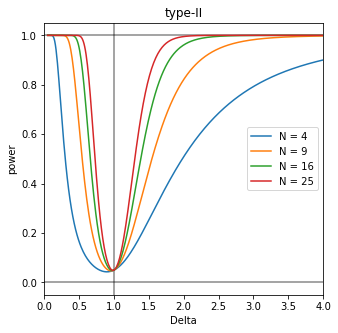

In [70]:
deltas = np.arange(0.05, 4.01, 0.01)
Ns = [x**2 for x in range(2, 6)]
a = 0.05

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    chia2 = spst.chi2.ppf([1 - a/2, a/2], df=N-1)
    power = spst.chi2.cdf(chia2[1] / deltas**2, df=N-1)
    power += 1 - spst.chi2.cdf(chia2[0] / deltas**2, df=N-1)
    plt.axhline(1.0, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0.0, lw=0.2, color=(0., 0., 0.))
    plt.axvline(1.0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((0., 4.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

## Design of sample size according to a specified power

The power is expressed as  
$$\begin{align}
1 - \beta \quad & = & \quad Pr\bigg(\chi^{2} \ge \frac{\chi^{2}(N - 1, \alpha/2)}{\Delta^{2}}\bigg) + Pr\bigg(\chi^{2} \le \frac{\chi^{2}(N - 1, 1 - \alpha/2)}{\Delta^{2}}\bigg)
\end{align}$$

There are a few approximations to chi-squared distributions.

(1) Fisher's

$$\begin{align}
\sqrt{2\chi^{2}} - \sqrt{2\phi - 1} \quad & \approx & \quad N(0, 1^{2})
\end{align}$$

(2) Wislon-Hilferty's

$$\begin{align}
\sqrt{\frac{9\phi}{2}}  \bigg[ \bigg( \frac{\chi^{2}}{\phi}\bigg)^{1/3} - \bigg(1 - \frac{2}{9\phi} \bigg) \bigg] \quad & \approx & \quad N(0, 1^{2})
\end{align}$$

Here, $\phi$ is the degree of freedom and $\phi = N - 1$ in our case. Each of them yields


### $\Delta > \Delta_{0>} > 1$.

$$\begin{align}
1 - \beta \quad & \approx & \quad Pr\bigg(\chi^{2} \ge \frac{\chi^{2}(N - 1, \alpha/2)}{\Delta^{2}}\bigg)
\end{align}$$

(1) Fisher's

$$\begin{align}
\frac{1}{2\Delta^{2}} \big(z_{\alpha/2} + \sqrt{2\phi - 1} \big) \quad & \approx & \quad \frac{1}{2}\big(z_{1-\beta} + \sqrt{2\phi - 1} \big) \\
\Rightarrow \qquad \phi \quad & \approx & \quad \frac{1}{2}\bigg( \frac{z_{\alpha/2} - \Delta z_{1-\beta}}{\Delta - 1}\bigg)^{2} + \frac{1}{2}\\
\Rightarrow \qquad N \quad & \approx & \quad \frac{1}{2}\bigg( \frac{z_{\alpha/2} - \Delta z_{1-\beta}}{\Delta - 1}\bigg)^{2} + \frac{3}{2}
\end{align}$$

(2) Wislon-Hilferty's


$$\begin{align}
\Rightarrow \qquad p \quad & = & \quad \Delta^{2/3}z_{1 - \beta} - z_{\alpha/2}\\
q \quad & = & \quad \Delta^{2/3} - 1\\
r \quad & = & \quad \frac{p + \sqrt{p^{2} + 4q^{2}}}{2q}\\
N \quad & \approx & \quad \frac{2}{9r^{2}} + 1
\end{align}$$







### $\Delta < \Delta_{0<} < 1$.

$$\begin{align}
1 - \beta \quad & \approx & \quad Pr\bigg(\chi^{2} \le \frac{\chi^{2}(\phi, 1 - \alpha/2)}{\Delta^{2}}\bigg)
\end{align}$$

Here, $\phi$ is the degree of freedom and $\phi = N - 1$ in our case. Each of them yields

(1) Fisher's

$$\begin{align}
N \quad & \approx & \quad \frac{1}{2}\bigg( \frac{z_{1 - \alpha/2} - \Delta z_{\beta}}{\Delta - 1}\bigg)^{2} + \frac{3}{2}
\end{align}$$

(2) Wislon-Hilferty's

$$\begin{align}
\Rightarrow \qquad p \quad & = & \quad \Delta^{2/3}z_{\beta} - z_{1 - \alpha/2}\\
q \quad & = & \quad \Delta^{2/3} - 1\\
r \quad & = & \quad \frac{p - \sqrt{p^{2} + 4q^{2}}}{2q}\\
N \quad & \approx & \quad \frac{2}{9r^{2}} + 1
\end{align}$$



## hypothesis

$H_{0}$: mean $\sigma = \sigma_{0}$

$H_{1}$: mean $\sigma > \sigma_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [75]:
N = 20         # number of samples.
sgm = 2.0      # sigma 0
mu_true = 10.0 # true mean
mu_test = 9.6  # mu0
sg0 = 1.8

x = np.random.normal(loc=mu_true, scale=sgm, size=N)
mu_pop = x.mean()
S = np.sqrt(((x - x.mean())**2).sum() / (N - 1))
print('population mean = {:2.3f}'.format(mu_pop))
print('S               = {:2.3f}'.format(S))

population mean = 10.059
S               = 1.826


Examine type-I error ($H_{1}$)

Here we test if $\sigma \neq \sigma_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\sigma$? (avoid false positive)

Define $\Delta = \frac{\sigma}{\sigma_{0}}$, $\chi_{0}^{2} = \frac{S}{\sigma_{0}^{2}}$ and $\chi^{2} = \frac{S}{\sigma^{2}}$.

$$\begin{align}
\alpha \quad & = &\quad Pr\big(\chi_{0}^{2} \ge \chi^{2}(\phi, \alpha)\big) \\
\quad & = &\quad Pr\big(\chi_{0}^{2} \ge \chi^{2}(N - 1, \alpha)\big)
\end{align}$$

In [76]:
chi0 = S / (sg0)**2
chia = spst.chi2.ppf([0.05], df=N-1)
print('dof       = {}'.format(N - 1))
print('chi_(a)   = {:1.4f}'.format(chia[0]))
print('S/sg0**2  =  {:1.4f}'.format(chi0))

dof       = 19
chi_(a)   = 10.1170
S/sg0**2  =  0.5635


Examine type-II error ($H_{1}$)

Here we test if $\sigma \neq \sigma_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\sigma$? (avoid false positive)

Define $\Delta = \frac{\sigma}{\sigma_{0}}$, $\chi_{0}^{2} = \frac{S}{\sigma_{0}^{2}}$ and $\chi^{2} = \frac{S}{\sigma^{2}}$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(\chi_{0}^{2} \ge \chi^{2}(N - 1, \alpha)\big)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma_{0}^{2}} \ge \chi^{2}(N - 1, \alpha)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}}\frac{\sigma^{2}}{\sigma_{0}^{2}} \ge \chi^{2}(N - 1, \alpha)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}}\Delta^{2} \ge \chi^{2}(N - 1, \alpha)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}} \ge \frac{\chi^{2}(N - 1, \alpha)}{\Delta^{2}}\bigg)
\end{align}$$

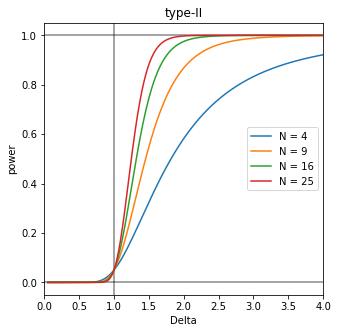

In [77]:
deltas = np.arange(0.05, 4.01, 0.01)
Ns = [x**2 for x in range(2, 6)]
a = 0.05

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    chia = spst.chi2.ppf([1 - a], df=N-1)
    power = 1 - spst.chi2.cdf(chia[0] / deltas**2, df=N-1)
    plt.axhline(1.0, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0.0, lw=0.2, color=(0., 0., 0.))
    plt.axvline(1.0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((0., 4.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### design of sample size according to a specified power

Suppose $\Delta > \Delta_{0>} > 1$.

$$\begin{align}
1 - \beta \quad & = & \quad Pr\bigg(\chi^{2} \ge \frac{\chi^{2}(N - 1, \alpha)}{\Delta^{2}}\bigg)
\end{align}$$

There are a few approximations to chi-squared distributions.

(1) Fisher's

$$\begin{align}
\sqrt{2\chi^{2}} - \sqrt{2\phi - 1} \quad & \approx & \quad N(0, 1^{2})
\end{align}$$

(2) Wislon-Hilferty's

$$\begin{align}
\sqrt{\frac{9\phi}{2}}  \bigg[ \bigg( \frac{\chi^{2}}{\phi}\bigg)^{1/3} - \bigg(1 - \frac{2}{9\phi} \bigg) \bigg] \quad & \approx & \quad N(0, 1^{2})
\end{align}$$

Here, $\phi$ is the degree of freedom and $\phi = N - 1$ in our case. Each of them yields

(1) Fisher's

$$\begin{align}
\chi^{2}(\phi, P) \quad & \approx & \quad \frac{1}{2}\big(z_{P} + \sqrt{2\phi - 1} \big)
\end{align}$$

Here, $z_{P}$ is the upper 100P% point. Using this approximation,

$$\begin{align}
1 - \beta \quad & = & \quad Pr\bigg(\chi^{2} \ge \frac{\chi^{2}(\phi, \alpha)}{\Delta^{2}}\bigg)\\
\quad & \approx & \quad Pr\bigg(\chi^{2} \ge \frac{1}{2\Delta^{2}} \big(z_{\alpha} + \sqrt{2\phi - 1} \big)\bigg)
\end{align}$$

and separately,

$$\begin{align}
\chi^{2}(\phi, 1 - \beta) \quad & \approx & \quad \frac{1}{2}\big(z_{1-\beta} + \sqrt{2\phi - 1} \big)
\end{align}$$

Thus, 

$$\begin{align}
\frac{1}{2\Delta^{2}} \big(z_{\alpha} + \sqrt{2\phi - 1} \big) \quad & \approx & \quad \frac{1}{2}\big(z_{1-\beta} + \sqrt{2\phi - 1} \big) \\
\Rightarrow \qquad \phi \quad & \approx & \quad \frac{1}{2}\bigg( \frac{z_{\alpha} - \Delta z_{1-\beta}}{\Delta - 1}\bigg)^{2} + \frac{1}{2}\\
\Rightarrow \qquad N \quad & \approx & \quad \frac{1}{2}\bigg( \frac{z_{\alpha} - \Delta z_{1-\beta}}{\Delta - 1}\bigg)^{2} + \frac{3}{2}
\end{align}$$

(2) Wislon-Hilferty's

$$\begin{align}
\chi^{2}(\phi, P) \quad & \approx & \quad \phi\bigg(\sqrt{\frac{2}{9\phi}}z_{P} + 1 - \frac{2}{9\phi} \bigg)^{3}
\end{align}$$

Here, $z_{P}$ is the upper 100P% point. Using this approximation,

$$\begin{align}
1 - \beta \quad & = & \quad Pr\bigg(\chi^{2} \ge \frac{\chi^{2}(\phi, \alpha)}{\Delta^{2}}\bigg)\\
\quad & \approx & \quad Pr\bigg(\chi^{2} \ge \frac{\phi}{\Delta^{2}}\bigg(\sqrt{\frac{2}{9\phi}}z_{\alpha} + 1 - \frac{2}{9\phi} \bigg)^{3}\bigg)
\end{align}$$

and separately,

$$\begin{align}
\chi^{2}(\phi, 1 - \beta) \quad & \approx & \quad \phi\bigg(\sqrt{\frac{2}{9\phi}}z_{1 - \beta} + 1 - \frac{2}{9\phi} \bigg)^{3}
\end{align}$$

Thus, 

$$\begin{align}
\frac{\phi}{\Delta^{2}}\bigg(\sqrt{\frac{2}{9\phi}}z_{\alpha} + 1 - \frac{2}{9\phi} \bigg)^{3} \quad & = & \quad \phi\bigg(\sqrt{\frac{2}{9\phi}}z_{1 - \beta} + 1 - \frac{2}{9\phi} \bigg)^{3}\\
\end{align}$$

, which yields

$$\begin{align}
\Rightarrow \qquad p \quad & = & \quad \Delta^{2/3}z_{1 - \beta} - z_{\alpha}\\
q \quad & = & \quad \Delta^{2/3} - 1\\
r \quad & = & \quad \frac{p + \sqrt{p^{2} + 4q^{2}}}{2q}\\
N \quad & \approx & \quad \frac{2}{9r^{2}} + 1
\end{align}$$





In [202]:
dd = 1.05 # delta
a = 0.05 # significance level
b = 0.1  # prob. type-II error.

za = spst.norm.ppf(1-a)
zb = spst.norm.ppf(b)

In [ ]:
# Fisher's approximation

N_fs = 0.5*(((za - zb)/(dd - 1))**2) + 1.5 # Fisher

In [ ]:
# numerical search

N = 1000
dfs = np.arange(1, N + 1)
cc = spst.chi2.ppf(1 - a, df=dfs) / dd**2
pwrs = 1 - spst.chi2.cdf(cc, df=dfs)
pwr = 1 - b
idx1 = 0
idx4 = N - 1
idx2 = idx1 + (idx4 - idx1) // 3
idx3 = idx4 - (idx4 - idx1) // 3
while True:
    if pwrs[idx1] == pwr:
        idx = idx1
        break
    elif pwrs[idx2] == pwr:
        idx = idx2
        break
    elif pwrs[idx3] == pwr:
        idx = idx3
        break
    elif pwrs[idx4] == pwr:
        idx = idx4
        break

    if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
        idx2 = idx1
        idx4 = idx3
        idx3 = idx4 - (idx4 - idx1) // 3
    elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
        idx3 = idx4
        idx1 = idx2
        idx2 = idx1 + (idx4 - idx1) // 3
    else:
        if idx4 <= idx1 + 3:
            idx1 = idx2
            idx4 = idx3
            idx2 = idx1 + 1
            idx3 = idx4 - 1
        else:
            idx1 = idx2
            idx4 = idx3
            idx2 = idx1 + (idx4 - idx1) // 3
            idx3 = idx4 - (idx4 - idx1) // 3
    #print('{:6d}, {:6d}, {:6d}, {:6d}'.format(dfs[idx1],dfs[idx2],dfs[idx3],dfs[idx4]))
    #print('{:1.4f}, {:1.4f}, {:1.4f}, {:1.4f}\n'.format(pwrs[idx1],pwrs[idx2],pwrs[idx3],pwrs[idx4]))

    if idx2 + 1 >= idx3:
        if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
            idx = idx2
            break
        elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
            idx = idx3
            break
        elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
            idx = idx4
            break
N_nm = dfs[idx] + 1 # N - 1 
print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
print('N = {:2d} (N_f = {:2.3f}, N_wh = {:2.3f}) \n'.format(N_nm, N_fs, N_wh))

In [158]:
print('numerical      : ', N_nm)
print('Fisher\'s       : ', N_fs)
print('Wislon-Hilferty: ', N_wh)

numerical      :  1794
Fisher's       :  1790.09744046
Wislon-Hilferty:  1793.26947766


## hypothesis

$H_{0}$: mean $\sigma = \sigma_{0}$

$H_{1}$: mean $\sigma < \sigma_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [78]:
N = 20         # number of samples.
sgm = 2.0      # sigma 0
mu_true = 10.0 # true mean
mu_test = 9.6  # mu0
sg0 = 1.8

x = np.random.normal(loc=mu_true, scale=sgm, size=N)
mu_pop = x.mean()
S = np.sqrt(((x - x.mean())**2).sum() / (N - 1))
print('population mean = {:2.3f}'.format(mu_pop))
print('S               = {:2.3f}'.format(S))

population mean = 10.169
S               = 1.904


Examine type-I error ($H_{1}$)

Here we test if $\sigma \neq \sigma_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\sigma$? (avoid false positive)

Define $\Delta = \frac{\sigma}{\sigma_{0}}$, $\chi_{0}^{2} = \frac{S}{\sigma_{0}^{2}}$ and $\chi^{2} = \frac{S}{\sigma^{2}}$.

$$\begin{align}
\alpha \quad & = &\quad Pr\big(\chi_{0}^{2} \le \chi^{2}(\phi, 1 - \alpha)\big) \\
\quad & = &\quad Pr\big(\chi_{0}^{2} \le \chi^{2}(N - 1, 1 -\alpha)\big)
\end{align}$$

In [79]:
chi0 = S / (sg0)**2
chia = spst.chi2.ppf([0.05], df=N-1)
print('dof       = {}'.format(N - 1))
print('chi_(a)   = {:1.4f}'.format(chia[0]))
print('S/sg0**2  =  {:1.4f}'.format(chi0))

dof       = 19
chi_(a)   = 10.1170
S/sg0**2  =  0.5875


Examine type-II error ($H_{1}$)

Here we test if $\sigma \neq \sigma_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\sigma$? (avoid false positive)

Define $\Delta = \frac{\sigma}{\sigma_{0}}$, $\chi_{0}^{2} = \frac{S}{\sigma_{0}^{2}}$ and $\chi^{2} = \frac{S}{\sigma^{2}}$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(\chi_{0}^{2} \le \chi^{2}(N - 1, 1 - \alpha)\big)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma_{0}^{2}} \le \chi^{2}(N - 1, 1 - \alpha)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}}\frac{\sigma^{2}}{\sigma_{0}^{2}} \le \chi^{2}(N - 1, 1 - \alpha)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}}\Delta^{2} \le \chi^{2}(N - 1, 1 - \alpha)\bigg)\\
\quad & = &\quad Pr\bigg(\frac{S}{\sigma^{2}} \le \frac{\chi^{2}(N - 1, 1 - \alpha)}{\Delta^{2}}\bigg)
\end{align}$$

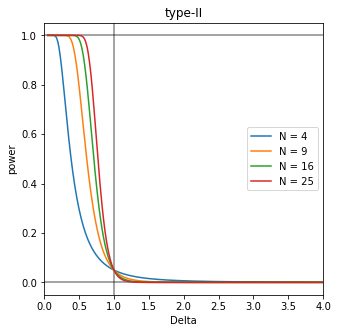

In [80]:
deltas = np.arange(0.05, 4.01, 0.01)
Ns = [x**2 for x in range(2, 6)]
a = 0.05

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    chia = spst.chi2.ppf([a], df=N-1)
    power = spst.chi2.cdf(chia[0] / deltas**2, df=N-1)
    plt.axhline(1.0, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0.0, lw=0.2, color=(0., 0., 0.))
    plt.axvline(1.0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((0., 4.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### design of sample size according to a specified power

Suppose $\Delta < \Delta_{0<} < 1$.

$$\begin{align}
1 - \beta \quad & = & \quad Pr\bigg(\chi^{2} \le \frac{\chi^{2}(\phi, 1 - \alpha)}{\Delta^{2}}\bigg)
\end{align}$$

Here, $\phi$ is the degree of freedom and $\phi = N - 1$ in our case. Each of them yields

(1) Fisher's

$$\begin{align}
N \quad & \approx & \quad \frac{1}{2}\bigg( \frac{z_{1 - \alpha} - \Delta z_{\beta}}{\Delta - 1}\bigg)^{2} + \frac{3}{2}
\end{align}$$

(2) Wislon-Hilferty's

$$\begin{align}
\Rightarrow \qquad p \quad & = & \quad \Delta^{2/3}z_{\beta} - z_{1 - \alpha}\\
q \quad & = & \quad \Delta^{2/3} - 1\\
r \quad & = & \quad \frac{p - \sqrt{p^{2} + 4q^{2}}}{2q}\\
N \quad & \approx & \quad \frac{2}{9r^{2}} + 1
\end{align}$$


In [146]:
dd = 0.95 # delta
a = 0.05 # significance level
b = 0.1  # prob. type-II error.

za = spst.norm.ppf(a)
zb = spst.norm.ppf(1 - b)

In [147]:
# Fisher's approximation

N_fs = 0.5*(((za - dd*zb)/(dd - 1))**2) + 1.5

In [148]:
# Wislon-Hilferty's approximation

p = dd ** (2/3) * zb - za
q = dd ** (2/3) - 1
r = (p - np.sqrt(p**2 + 4 * q**2))/(2 * q)
N_wh = 2/(9 * r**2) + 1

In [153]:
# numerical search
N = 10000
dfs = np.arange(1, N + 1)
cc = spst.chi2.ppf(a, df=dfs) / dd**2    
pwrs = spst.chi2.cdf(cc, df=dfs)
pwr = 1 - b
idx1 = 0
idx4 = N - 1
idx2 = idx1 + (idx4 - idx1) // 3
idx3 = idx4 - (idx4 - idx1) // 3
while True:
    if pwrs[idx1] == pwr:
        idx = idx1
        break
    elif pwrs[idx2] == pwr:
        idx = idx2
        break
    elif pwrs[idx3] == pwr:
        idx = idx3
        break
    elif pwrs[idx4] == pwr:
        idx = idx4
        break

    if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
        idx2 = idx1
        idx4 = idx3
        idx3 = idx4 - (idx4 - idx1) // 3
    elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
        idx3 = idx4
        idx1 = idx2
        idx2 = idx1 + (idx4 - idx1) // 3
    else:
        if idx4 <= idx1 + 3:
            idx1 = idx2
            idx4 = idx3
            idx2 = idx1 + 1
            idx3 = idx4 - 1
        else:
            idx1 = idx2
            idx4 = idx3
            idx2 = idx1 + (idx4 - idx1) // 3
            idx3 = idx4 - (idx4 - idx1) // 3
    #print('{:6d}, {:6d}, {:6d}, {:6d}'.format(dfs[idx1],dfs[idx2],dfs[idx3],dfs[idx4]))
    #print('{:1.4f}, {:1.4f}, {:1.4f}, {:1.4f}\n'.format(pwrs[idx1],pwrs[idx2],pwrs[idx3],pwrs[idx4]))

    if idx2 + 1 >= idx3:
        if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
            idx = idx2
            break
        elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
            idx = idx3
            break
        elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
            idx = idx4
            break
N_nm = dfs[idx] + 1 # N - 1 
print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
print('N = {:2d} (N_f = {:2.3f}, N_wh = {:2.3f}) \n'.format(N_nm, N_fs, N_wh))

     1,      1,   4445,   6667
0.0526, 0.0526, 0.9994, 1.0000

     1,   1482,   2964,   4445
0.0526, 0.8725, 0.9897, 0.9994

  1482,   1976,   2470,   2964
0.8725, 0.9427, 0.9753, 0.9897

  1482,   1482,   2141,   2470
0.8725, 0.8725, 0.9566, 0.9753

  1482,   1701,   1922,   2141
0.8725, 0.9100, 0.9373, 0.9566

  1482,   1482,   1776,   1922
0.8725, 0.8725, 0.9203, 0.9373

  1482,   1580,   1678,   1776
0.8725, 0.8908, 0.9066, 0.9203

  1580,   1612,   1646,   1678
0.8908, 0.8962, 0.9017, 0.9066

  1612,   1623,   1635,   1646
0.8962, 0.8980, 0.9000, 0.9017

  1623,   1630,   1646,   1646
0.8980, 0.8992, 0.9017, 0.9017

  1630,   1635,   1641,   1646
0.8992, 0.9000, 0.9009, 0.9017

  1635,   1637,   1639,   1641
0.9000, 0.9003, 0.9006, 0.9009

  1635,   1635,   1638,   1639
0.9000, 0.9000, 0.9004, 0.9006

  1635,   1636,   1637,   1638
0.9000, 0.9001, 0.9003, 0.9004

power = 0.90, delta = 0.950
N = 1637 (N_f = 1640.084, N_wh = 1636.166) 



In [223]:
print('numerical      : ', N_nm)
print('Fisher\'s       : ', N_fs)
print('Wislon-Hilferty: ', N_wh)

numerical      :  1635
Fisher's       :  1640.08387422
Wislon-Hilferty:  1636.16646964


## exercises 4.1 - 4.10

In [37]:
x = np.array([6.2, 4.8, 7.3, 5.5, 6.5, 4.9, 6.8, 7.9, 6.6, 7.3])

N = x.shape[0]
xm = x.mean()
S = ((x - xm)**2).sum()
print('population mean = {:2.3f}'.format(xm))
print('S               = {:2.3f}'.format(S))

a = 0.05
sg0 = 2.0
chi0 = S / (sg0)**2
chia2 = spst.chi2.ppf([1 - a/2, a/2], df=N-1)

print('\ndof         = {}'.format(N - 1))
print('chi_(a/2)   = {:1.4f}'.format(chia2[0]))
print('chi_(1-a/2) =  {:1.4f}'.format(chia2[1]))
print('S/sg0**2    =  {:1.4f}'.format(chi0))

population mean = 6.380
S               = 9.736

dof         = 9
chi_(a/2)   = 19.0228
chi_(1-a/2) =  2.7004
S/sg0**2    =  2.4340


In [36]:
x = np.array([10.8, 11.2, 9.7, 9.9, 12.0, 9.6, 10.5, 10.7, 10.1])

N = x.shape[0]
xm = x.mean()
S = ((x - xm)**2).sum()
print('population mean = {:2.3f}'.format(xm))
print('S               = {:2.3f}'.format(S))

a = 0.05
sg0 = 0.6
chi0 = S / (sg0)**2
chia = spst.chi2.ppf([1 - a], df=N-1)

print('\ndof         = {}'.format(N - 1))
print('chi2_a      = {:1.4f}'.format(chia[0]))
print('S/sg0**2    = {:1.4f}'.format(chi0))

population mean = 10.500
S               = 4.840

dof         = 8
chi2_a      = 15.5073
S/sg0**2    = 13.4444


In [42]:
x = np.array([21, 19, 16, 19, 22, 18, 20, 21])

N = x.shape[0]
xm = x.mean()
S = ((x - xm)**2).sum()
print('population mean = {:2.3f}'.format(xm))
print('S               = {:2.3f}'.format(S))

a = 0.05
sg0 = 4.0
chi0 = S / (sg0)**2
chia = spst.chi2.ppf(q=[a], df=N-1)

print('\ndof         = {}'.format(N - 1))
print('chi2_a      = {:1.4f}'.format(chia[0]))
print('S/sg0**2    = {:1.4f}'.format(chi0))

population mean = 19.500
S               = 26.000

dof         = 7
chi2_a      = 2.1673
S/sg0**2    = 1.6250


In [65]:
Ns = [10, 20]
deltas = [0.5, 0.5]
a = 0.05

for delta, N in zip(deltas, Ns):
    chia2 = spst.chi2.ppf([1 - a/2, a/2], df=N-1)
    chia2 /= delta**2
    beta  = spst.chi2.cdf(x=chia2[0], df=N-1)
    beta -= spst.chi2.cdf(x=chia2[1], df=N-1)
    #print(spst.chi2.cdf(x=chia2[0], df=N-1), spst.chi2.cdf(x=chia2[1], df=N-1))
    print('N = {:2d}, power = {:1.5f}'.format(N, 1 - beta))

N = 10, power = 0.71044
N = 20, power = 0.98827


In [67]:
Ns = [9, 9]
deltas = [1.5, 2.0]
a = 0.05

for delta, N in zip(deltas, Ns):
    chia = spst.chi2.ppf([1 - a], df=N-1)
    chia /= delta**2
    beta  = spst.chi2.cdf(x=chia[0], df=N-1)
    print('N = {:2d}, power = {:1.5f}'.format(N, 1 - beta))

N =  9, power = 0.54831
N =  9, power = 0.86806


In [71]:
Ns = [8, 16]
deltas = [0.8, 0.8]
a = 0.05

for delta, N in zip(deltas, Ns):
    chia = spst.chi2.ppf([a], df=N-1)
    chia /= delta**2
    beta  = 1 - spst.chi2.cdf(x=chia[0], df=N-1)
    print('N = {:2d}, power = {:1.5f}'.format(N, 1 - beta))

N =  8, power = 0.15290
N = 16, power = 0.27224


In [198]:
deltas = [9/5, 5/9] # delta
a = 0.05 # significance level
powers = [0.9, 0.95] # prob. type-II error.

for pwr in powers:
    N_nm = []
    for dd in deltas:
        za = spst.norm.ppf(a/2)
        z1b = spst.norm.ppf(pwr)

        # Fisher's approximation

        N_fs = 0.5*(((za - dd*z1b)/(dd - 1))**2) + 1.5

        # Wislon-Hilferty's approximation

        p = dd ** (2/3) * z1b - za
        q = dd ** (2/3) - 1
        r = (p - np.sqrt(p**2 + 4 * q**2))/(2 * q)
        N_wh = 2/(9 * r**2) + 1

        # numerical search

        N = 100
        dfs = np.arange(1, N + 1)
        if dd > 1:
            cc = spst.chi2.ppf(1 - a/2, df=dfs) / dd**2
            pwrs = 1 - spst.chi2.cdf(cc, df=dfs)
        else:
            cc = spst.chi2.ppf(a/2, df=dfs) / dd**2    
            pwrs = spst.chi2.cdf(cc, df=dfs)
        idx1 = 0
        idx4 = N - 1
        idx2 = idx1 + (idx4 - idx1) // 3
        idx3 = idx4 - (idx4 - idx1) // 3
        while True:
            if pwrs[idx1] == pwr:
                idx = idx1
                break
            elif pwrs[idx2] == pwr:
                idx = idx2
                break
            elif pwrs[idx3] == pwr:
                idx = idx3
                break
            elif pwrs[idx4] == pwr:
                idx = idx4
                break
                
            if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
                idx2 = idx1
                idx4 = idx3
                idx3 = idx4 - (idx4 - idx1) // 3
            elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
                idx3 = idx4
                idx1 = idx2
                idx2 = idx1 + (idx4 - idx1) // 3
            else:
                if idx4 <= idx1 + 3:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + 1
                    idx3 = idx4 - 1
                else:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + (idx4 - idx1) // 3
                    idx3 = idx4 - (idx4 - idx1) // 3
            
            if idx2 + 1 >= idx3:
                if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
                    idx = idx2
                    break
                elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
                    idx = idx3
                    break
                elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
                    idx = idx4
                    break
        N_nm.append(dfs[idx] + 1) # N - 1 

        print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
        print('N     = {:2d}\nN_f   = {:2.3f}\nN_wh  = {:2.3f}\n'.format(N_nm[-1], N_fs, N_wh))
    N_nm.sort()
    print('====== number of sample = {:2d} \n'.format(N_nm[-1]))

power = 0.90, delta = 1.800
N     = 16
N_f   = 15.723
N_wh  = 15.801

power = 0.90, delta = 0.556
N     = 19
N_f   = 19.571
N_wh  = 18.327

====== number of sample = 19 

power = 0.95, delta = 1.800
N     = 21
N_f   = 20.417
N_wh  = 20.084

power = 0.95, delta = 0.556
N     = 22
N_f   = 22.404
N_wh  = 21.389

====== number of sample = 22 



In [197]:
deltas = [2.0] # delta
a = 0.05 # significance level
powers = [0.9, 0.95] # prob. type-II error.

for pwr in powers:
    N_nm = []
    for dd in deltas:
        za = spst.norm.ppf(1-a)
        z1b = spst.norm.ppf(1-pwr)

        # Fisher's approximation

        N_fs = 0.5*(((za - dd*z1b)/(dd - 1))**2) + 1.5

        # Wislon-Hilferty's approximation

        p = dd ** (2/3) * z1b - za
        q = dd ** (2/3) - 1
        r = (p + np.sqrt(p**2 + 4 * q**2))/(2 * q)
        N_wh = 2/(9 * r**2) + 1

        # numerical search

        N = 100
        dfs = np.arange(1, N + 1)
        if dd > 1:
            cc = spst.chi2.ppf(1 - a, df=dfs) / dd**2
            pwrs = 1 - spst.chi2.cdf(cc, df=dfs)
        else:
            cc = spst.chi2.ppf(a, df=dfs) / dd**2    
            pwrs = spst.chi2.cdf(cc, df=dfs)
        idx1 = 0
        idx4 = N - 1
        idx2 = idx1 + (idx4 - idx1) // 3
        idx3 = idx4 - (idx4 - idx1) // 3
        while True:
            if pwrs[idx1] == pwr:
                idx = idx1
                break
            elif pwrs[idx2] == pwr:
                idx = idx2
                break
            elif pwrs[idx3] == pwr:
                idx = idx3
                break
            elif pwrs[idx4] == pwr:
                idx = idx4
                break
                
            if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
                idx2 = idx1
                idx4 = idx3
                idx3 = idx4 - (idx4 - idx1) // 3
            elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
                idx3 = idx4
                idx1 = idx2
                idx2 = idx1 + (idx4 - idx1) // 3
            else:
                if idx4 <= idx1 + 3:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + 1
                    idx3 = idx4 - 1
                else:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + (idx4 - idx1) // 3
                    idx3 = idx4 - (idx4 - idx1) // 3
            
            if idx2 + 1 >= idx3:
                if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
                    idx = idx2
                    break
                elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
                    idx = idx3
                    break
                elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
                    idx = idx4
                    break
        N_nm.append(dfs[idx] + 1) # N - 1 

        print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
        print('N     = {:2d}\nN_f   = {:2.3f}\nN_wh  = {:2.3f}\n'.format(N_nm[-1], N_fs, N_wh))

power = 0.90, delta = 2.000
N     = 11
N_f   = 10.353
N_wh  = 10.157

power = 0.95, delta = 2.000
N     = 14
N_f   = 13.675
N_wh  = 13.106



In [196]:
deltas = [0.5] # delta
a = 0.05 # significance level
powers = [0.9, 0.95] # prob. type-II error.

for pwr in powers:
    N_nm = []
    for dd in deltas:
        za = spst.norm.ppf(a)
        z1b = spst.norm.ppf(pwr)

        # Fisher's approximation

        N_fs = 0.5*(((za - dd*z1b)/(dd - 1))**2) + 1.5

        # Wislon-Hilferty's approximation

        p = dd ** (2/3) * z1b - za
        q = dd ** (2/3) - 1
        r = (p - np.sqrt(p**2 + 4 * q**2))/(2 * q)
        N_wh = 2/(9 * r**2) + 1

        # numerical search

        N = 100
        dfs = np.arange(1, N + 1)
        if dd > 1:
            cc = spst.chi2.ppf(1 - a, df=dfs) / dd**2
            pwrs = 1 - spst.chi2.cdf(cc, df=dfs)
        else:
            cc = spst.chi2.ppf(a, df=dfs) / dd**2    
            pwrs = spst.chi2.cdf(cc, df=dfs)
        idx1 = 0
        idx4 = N - 1
        idx2 = idx1 + (idx4 - idx1) // 3
        idx3 = idx4 - (idx4 - idx1) // 3
        while True:
            if pwrs[idx1] == pwr:
                idx = idx1
                break
            elif pwrs[idx2] == pwr:
                idx = idx2
                break
            elif pwrs[idx3] == pwr:
                idx = idx3
                break
            elif pwrs[idx4] == pwr:
                idx = idx4
                break
                
            if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
                idx2 = idx1
                idx4 = idx3
                idx3 = idx4 - (idx4 - idx1) // 3
            elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
                idx3 = idx4
                idx1 = idx2
                idx2 = idx1 + (idx4 - idx1) // 3
            else:
                if idx4 <= idx1 + 3:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + 1
                    idx3 = idx4 - 1
                else:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + (idx4 - idx1) // 3
                    idx3 = idx4 - (idx4 - idx1) // 3
            
            if idx2 + 1 >= idx3:
                if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
                    idx = idx2
                    break
                elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
                    idx = idx3
                    break
                elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
                    idx = idx4
                    break
        N_nm.append(dfs[idx] + 1) # N - 1 

        print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
        print('N     = {:2d}\nN_f   = {:2.3f}\nN_wh  = {:2.3f}\n'.format(N_nm[-1], N_fs, N_wh))

power = 0.90, delta = 0.500
N     = 12
N_f   = 11.948
N_wh  = 11.198

power = 0.95, delta = 0.500
N     = 14
N_f   = 13.675
N_wh  = 13.106



In [200]:
deltas = [0.9, 0.95, 0.99] # delta
a = 0.05 # significance level
powers = [0.9, 0.95, 0.99] # prob. type-II error.

for pwr in powers:
    N_nm = []
    for dd in deltas:
        za = spst.norm.ppf(a)
        z1b = spst.norm.ppf(pwr)

        # Fisher's approximation

        N_fs = 0.5*(((za - dd*z1b)/(dd - 1))**2) + 1.5

        # Wislon-Hilferty's approximation

        p = dd ** (2/3) * z1b - za
        q = dd ** (2/3) - 1
        r = (p - np.sqrt(p**2 + 4 * q**2))/(2 * q)
        N_wh = 2/(9 * r**2) + 1

        # numerical search

        N = 100000
        dfs = np.arange(1, N + 1)
        if dd > 1:
            cc = spst.chi2.ppf(1 - a, df=dfs) / dd**2
            pwrs = 1 - spst.chi2.cdf(cc, df=dfs)
        else:
            cc = spst.chi2.ppf(a, df=dfs) / dd**2    
            pwrs = spst.chi2.cdf(cc, df=dfs)
        idx1 = 0
        idx4 = N - 1
        idx2 = idx1 + (idx4 - idx1) // 3
        idx3 = idx4 - (idx4 - idx1) // 3
        while True:
            if pwrs[idx1] == pwr:
                idx = idx1
                break
            elif pwrs[idx2] == pwr:
                idx = idx2
                break
            elif pwrs[idx3] == pwr:
                idx = idx3
                break
            elif pwrs[idx4] == pwr:
                idx = idx4
                break
                
            if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
                idx2 = idx1
                idx4 = idx3
                idx3 = idx4 - (idx4 - idx1) // 3
            elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
                idx3 = idx4
                idx1 = idx2
                idx2 = idx1 + (idx4 - idx1) // 3
            else:
                if idx4 <= idx1 + 3:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + 1
                    idx3 = idx4 - 1
                else:
                    idx1 = idx2
                    idx4 = idx3
                    idx2 = idx1 + (idx4 - idx1) // 3
                    idx3 = idx4 - (idx4 - idx1) // 3
            
            if idx2 + 1 >= idx3:
                if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
                    idx = idx2
                    break
                elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
                    idx = idx3
                    break
                elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
                    idx = idx4
                    break
        N_nm.append(dfs[idx] + 1) # N - 1 

        print('power = {:1.2f}\ndelta = {:1.2f}'.format(pwr, dd))
        print('N     = {:2d}\nN_f   = {:2.3f}\nN_wh  = {:2.3f}\n'.format(N_nm[-1], N_fs, N_wh))

power = 0.90
delta = 0.90
N     = 391
N_f   = 393.010
N_wh  = 390.864

power = 0.90
delta = 0.95
N     = 1637
N_f   = 1640.084
N_wh  = 1636.166

power = 0.90
delta = 0.99
N     = 42429
N_f   = 42446.524
N_wh  = 42428.432

power = 0.95
delta = 0.90
N     = 490
N_f   = 489.851
N_wh  = 489.294

power = 0.95
delta = 0.95
N     = 2059
N_f   = 2059.066
N_wh  = 2058.509

power = 0.95
delta = 0.99
N     = 53573
N_f   = 53572.613
N_wh  = 53572.057

power = 0.99
delta = 0.90
N     = 704
N_f   = 700.344
N_wh  = 703.815

power = 0.99
delta = 0.95
N     = 2982
N_f   = 2973.526
N_wh  = 2981.506

power = 0.99
delta = 0.99
N     = 77977
N_f   = 77932.573
N_wh  = 77976.636

